Index(['age', 'bmi'], dtype='object')


C:\Users\Sohail Dil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sohail Dil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Sohail Dil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sohail Dil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by s

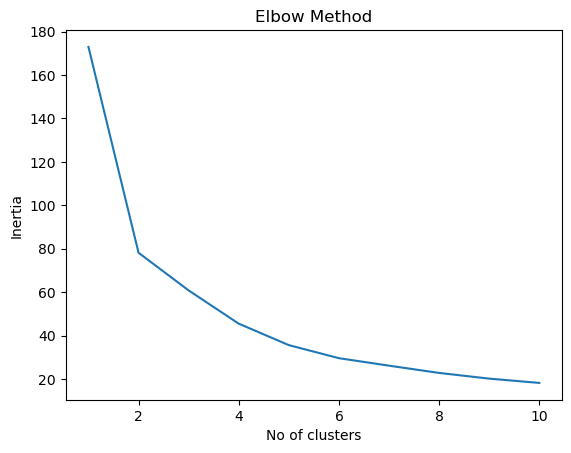

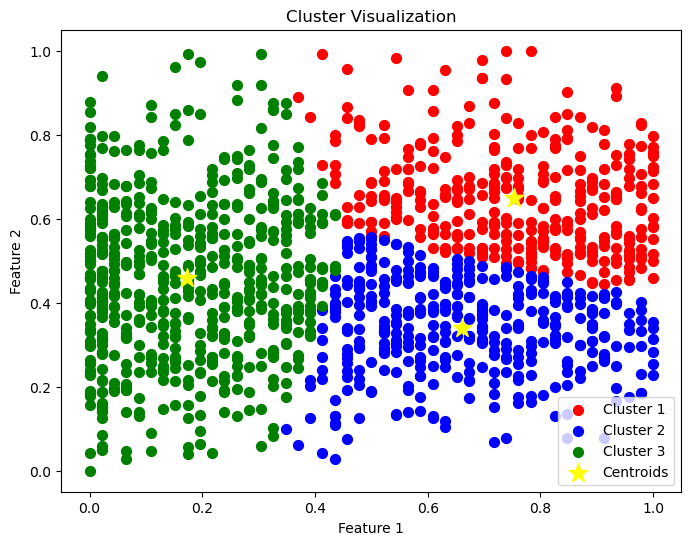

C:\Users\Sohail Dil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sohail Dil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Sohail Dil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sohail Dil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by s

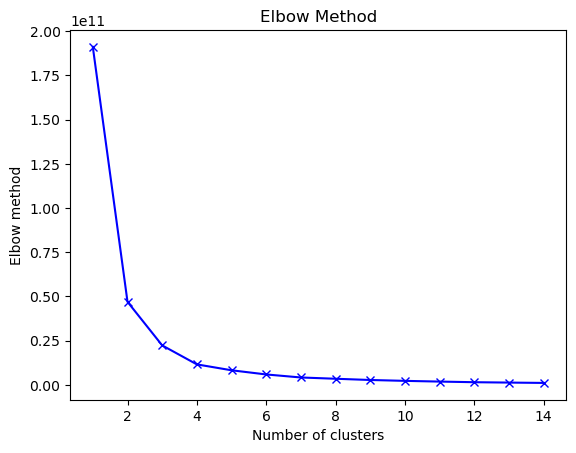

C:\Users\Sohail Dil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sohail Dil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Sohail Dil\AppData\Local\Temp\ipykernel_31580\2311784832.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['cluster_id'] = cluster_id


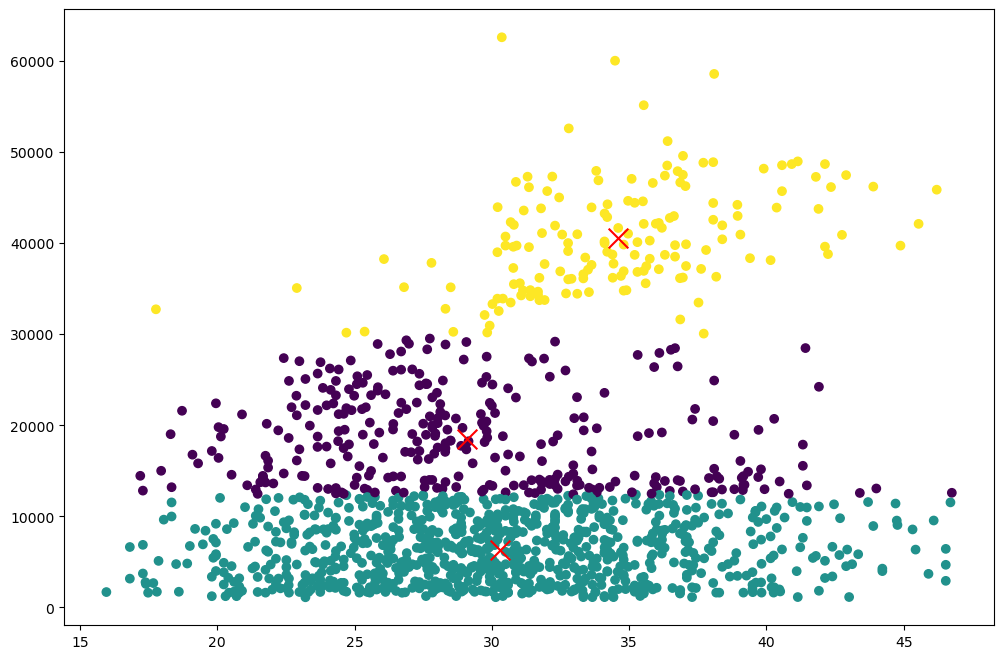

Random Forest RMSE:  4989.6204156793865
Random Forest R2 Score:  0.8319342960898206
Gradient Boosting RMSE:  4486.89726780789
Gradient Boosting R2 Score:  0.8640947183908813
Neural Networks RMSE:  5346.106988070907
Neural Networks R2 Score:  0.8070612883197594
R squared vale :  0.7445938446831092
R squared vale :  0.7678385458611793


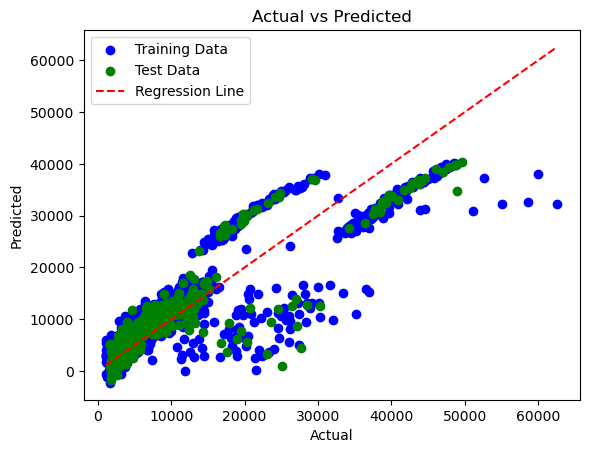

In [24]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn import metrics

# pre processing step1

data_frame = pd.read_csv('insurance.csv')

missing_values=data_frame.isnull().sum()

if missing_values.any():
  data_frame = data_frame.dropna()  # Remove rows with missing values
  data_frame.fillna(method='ffill', inplace=True)  # Forward fill

Q1 = data_frame[['age','bmi']].quantile(0.25)
Q3 = data_frame[['age','bmi']].quantile(0.75)
IQR = Q3 - Q1
data_frame = data_frame[~((data_frame['age'] < (Q1['age'] - 1.5 * IQR['age'])) | (data_frame['age'] > (Q3['age'] + 1.5 * IQR['age'])))]
data_frame = data_frame[~((data_frame['bmi'] < (Q1['bmi'] - 1.5 * IQR['bmi'])) | (data_frame['bmi'] > (Q3['bmi'] + 1.5 * IQR['bmi'])))]



# encoding sex column
data_frame.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
data_frame.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
data_frame.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)


new_df = data_frame.drop(["sex","smoker","region","charges","children"],axis=1)
ms = MinMaxScaler()
X = ms.fit_transform(new_df)
print(new_df.columns)


k_rng=range(1,11)
sse=[]
for k in k_rng :
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    
plt.xlabel("No of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.plot(k_rng,sse)

km = KMeans(n_clusters=3)
y_pred = km.fit_predict(X)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=200, c='yellow', marker='*', label='Centroids')
plt.title('Cluster Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()





X1 = data_frame[["bmi", "charges"]]
sse = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X1)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1, 15), sse, 'bx-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Elbow method')
plt.show()
    
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
cluster_id = kmeans.fit_predict(X1)

cluster_id

X1['cluster_id'] = cluster_id

fig = plt.figure(figsize=(12,8))

plt.scatter(X1.values[:,0], X1.values[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='red', marker="x", s=200)
plt.show()
    
    

    
  
X = data_frame.drop(['charges'], axis=1)
y = data_frame['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build machine learning models to predict the demand for healthcare resources

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

# Gradient Boosting
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
gb_predictions = gb.predict(X_test)

# Neural Networks
nn = MLPRegressor(max_iter=10000, random_state=42)
nn.fit(X_train, y_train)
nn_predictions = nn.predict(X_test)


# Evaluate the models' performance

# Random Forest
print("Random Forest RMSE: ", np.sqrt(mean_squared_error(y_test, rf_predictions)))
print("Random Forest R2 Score: ", r2_score(y_test, rf_predictions))

# Gradient Boosting
print("Gradient Boosting RMSE: ", np.sqrt(mean_squared_error(y_test, gb_predictions)))
print("Gradient Boosting R2 Score: ", r2_score(y_test, gb_predictions))

# Neural Networks
print("Neural Networks RMSE: ", np.sqrt(mean_squared_error(y_test, nn_predictions)))
print("Neural Networks R2 Score: ", r2_score(y_test, nn_predictions))



#linear regression model

regressor = LinearRegression()
regressor.fit(X_train, y_train)
training_data_prediction =regressor.predict(X_train)
r2_train = metrics.r2_score(y_train, training_data_prediction)  #Compare our actual output Ytrain with output we got through prediction
print('R squared vale : ', r2_train)


# prediction on test data
test_data_prediction =regressor.predict(X_test)
# R squared value
r2_test = metrics.r2_score(y_test, test_data_prediction) #comparing with ytest the actual output we have
print('R squared vale : ', r2_test)


# we will see that our r2_train R square value and r2test R square value is close which shows there is no overfitting.




plt.scatter(y_train, training_data_prediction, color='blue', label='Training Data')

# Plotting the test data
plt.scatter(y_test, test_data_prediction, color='green', label='Test Data')

# Plotting the regression line
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Regression Line')

plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

